# Course:  Convolutional Neural Networks for Image Classification

## Section-5
### Construct deep architectures for CNN models
#### How many Feature Maps in Convolutional layers?

**Description:**  
*Examine number of feature maps for every convolutional layer  
Interpret notation*

**File:** *feature_maps.ipynb*

### Algorithm:

**--> Step 1:** Open preprocessed dataset  
**--> Step 2:** Convert classes vectors to binary matrices  
**--> Step 3:** Choose **number of Feature Maps**  
**--> Step 4:** Visualize built CNN models  
**--> Step 5:** Set up learning rate & epochs  
**--> Step 6:** Train built CNN models  
**--> Step 7:** Show and plot accuracies  
**--> Step 8:** Make a conclusion  


**Result:**  
- Chosen architecture for every preprocessed dataset  


## Importing libraries

In [1]:
# Importing needed libraries
import matplotlib.pyplot as plt
import numpy as np
import h5py


from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.callbacks import LearningRateScheduler
from keras.utils import plot_model


## Setting up full path to preprocessed datasets

In [2]:
# Full or absolute path to 'Section4' with preprocessed datasets
# (!) On Windows, the path should look like following:
# r'C:\Users\your_name\PycharmProjects\CNNCourse\Section4'
# or:
# 'C:\\Users\\your_name\\PycharmProjects\\CNNCourse\\Section4'
full_path_to_Section4 = \
    'C:\\Users\\anaso\\OneDrive - Instituto Superior de Engenharia de Lisboa\\CNNCourse\\Section4'


### RGB custom dataset (255.0 ==> mean ==> std)

## Step 1: Opening preprocessed dataset

In [3]:
# Opening saved custom dataset from HDF5 binary file
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'custom' + '/' + 
               'dataset_custom_rgb_255_mean_std.hdf5', 'r') as f:
    
    # Showing all keys in the HDF5 binary file
    print(list(f.keys()))
    
    # Extracting saved arrays for training by appropriate keys
    # Saving them into new variables
    x_train = f['x_train']  # HDF5 dataset
    y_train = f['y_train']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_train = np.array(x_train)  # Numpy arrays
    y_train = np.array(y_train)  # Numpy arrays
    
    
    # Extracting saved arrays for validation by appropriate keys
    # Saving them into new variables
    x_validation = f['x_validation']  # HDF5 dataset
    y_validation = f['y_validation']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_validation = np.array(x_validation)  # Numpy arrays
    y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Extracting saved arrays for testing by appropriate keys
    # Saving them into new variables
    x_test = f['x_test']  # HDF5 dataset
    y_test = f['y_test']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_test = np.array(x_test)  # Numpy arrays
    y_test = np.array(y_test)  # Numpy arrays


['x_test', 'x_train', 'x_validation', 'y_test', 'y_train', 'y_validation']


In [4]:
# Showing types of loaded arrays
print(type(x_train))
print(type(y_train))
print(type(x_validation))
print(type(y_validation))
print(type(x_test))
print(type(y_test))
print()


# Showing shapes of loaded arrays
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

(10, 64, 64, 3)
(10,)
(3, 64, 64, 3)
(3,)
(1, 64, 64, 3)
(1,)


### RGB custom dataset (255.0 ==> mean ==> std)

## Step 2: Converting classes vectors to classes matrices

In [5]:
# Showing class index from the vector
print('Class index from vector:', y_train[1])
print()

# Preparing classes to be passed into the model
# Transforming them from vectors to binary matrices
# It is needed to set relationship between classes to be understood by the algorithm
# Such format is commonly used in training and predicting
y_train = to_categorical(y_train, num_classes = 5)
y_validation = to_categorical(y_validation, num_classes = 5)


# Showing shapes of converted vectors into matrices
print(y_train.shape)
print(y_validation.shape)
print()


# Showing class index from the matrix
print('Class index from matrix:', y_train[1])


Class index from vector: 2

(10, 5)
(3, 5)

Class index from matrix: [0. 0. 1. 0. 0.]


### RGB custom dataset (255.0 ==> mean ==> std)

## Step 3: Choosing number of Feature Maps

### Notation

**C** - convolutional layer  
**P** - pooling  
  
Examples:
* **8C5** - convolutional layer with 8 feature maps and kernels of spatial size 5x5  
* **P2** - pooling operation with 2x2 window and stride 2  
*  **128** - fully connected layer (dense layer) with 128 neurons  
  
Definitions:
* **filters** (also called as kernels or cores) are trainable parameters  
* **weights** are values of filters that network learns during training  
* **strides** are steps by which window of filter size goes through the input  
* **padding** is a 0-valued frame used to process edges of the input  
  
Some keywords values:
* **kernel_size=5** sets the filter size to be 5x5
* **strides=1** is a default value
* **padding='valid'** is a default value, meaning that output will be reduced: kernel_size - 1  
* **padding='same'** means that output will be of the same spatial size as input  
* **activation='relu'** sets ReLU (Rectified Linear Unit) as activation function  
  
Calculations of spatial size for feature maps after convolutional layer:  
* **height_output = 1 + (height_input + 2 * pad - kernel_size) / stride**
* **width_output = 1 + (width_input + 2 * pad - kernel_size) / stride**
  
Example without pad frame:
* **height_output = 1 + (64 + 2 * 0 - 5) / 1 = 60**
* **width_output = 1 + (64 + 2 * 0 - 5) / 1 = 60**
  
Example with pad frame:
* **height_output = 1 + (64 + 2 * 2 - 5) / 1 = 64**
* **width_output = 1 + (64 + 2 * 2 - 5) / 1 = 64**
  

In [6]:
# Building 5 models
# RGB --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> {64C5-P2} --> 128 --> 5
# RGB --> {16C5-P2} --> {32C5-P2} --> {64C5-P2} --> {128C5-P2} --> 128 --> 5
# RGB --> {32C5-P2} --> {64C5-P2} --> {128C5-P2} --> {256C5-P2} --> 128 --> 5
# RGB --> {64C5-P2} --> {128C5-P2} --> {256C5-P2} --> {512C5-P2} --> 128 --> 5
# RGB --> {128C5-P2} --> {256C5-P2} --> {512C5-P2} --> {1024C5-P2} --> 128 --> 5


# Defining list to collect models in
model = []


# Building models in a loop
for i in range(5):
    # Initializing model to be as linear stack of layers
    temp = Sequential()

    # Adding first convolutional-pooling pair
    temp.add(Conv2D(8 * (2 ** i), kernel_size=5, padding='same', activation='relu', 
                                                                 input_shape=(64, 64, 3)))
    temp.add(MaxPool2D())

    # Adding second convolutional-pooling pair
    temp.add(Conv2D(16 * (2 ** i), kernel_size=5, padding='same', activation='relu'))
    temp.add(MaxPool2D())

    # Adding third convolutional-pooling pair
    temp.add(Conv2D(32 * (2 ** i), kernel_size=5, padding='same', activation='relu'))
    temp.add(MaxPool2D())

    # Adding fourth convolutional-pooling pair
    temp.add(Conv2D(64 * (2 ** i), kernel_size=5, padding='same', activation='relu'))
    temp.add(MaxPool2D())

    # Adding fully connected layers
    temp.add(Flatten())
    temp.add(Dense(128, activation='relu'))
    temp.add(Dense(5, activation='softmax'))

    # Compiling created model
    temp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Adding current model in the list
    model.append(temp)


# Check point
print('5 models are compiled successfully')


5 models are compiled successfully


### RGB custom dataset (255.0 ==> mean ==> std)

## Step 4: Visualizing built CNN models

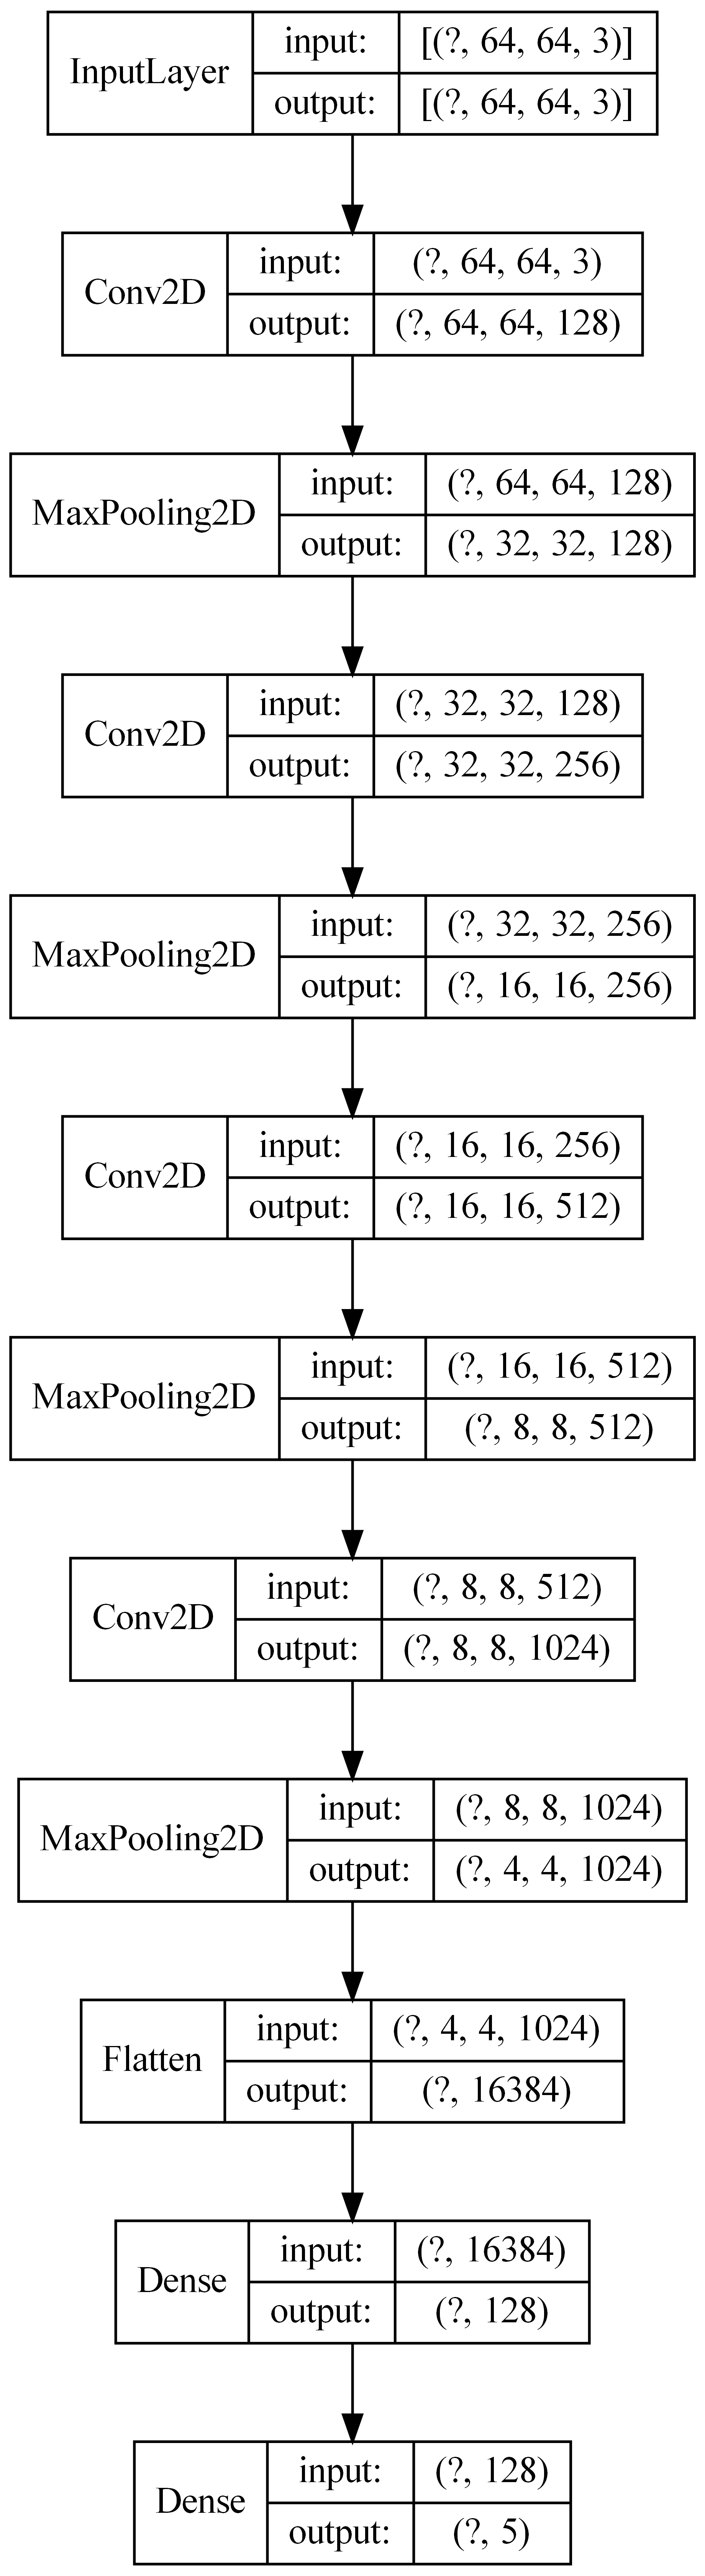

In [7]:
# Plotting model's layers in form of flowchart
plot_model(model[4],
           to_file='model.png',
           show_shapes=True,
           show_layer_names=False,
           rankdir='TB',
           dpi=500)


In [8]:
# Showing model's summary in form of table
model[4].summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 64, 64, 128)       9728      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 256)       819456    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 512)       3277312   
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 8, 8, 512)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 1024)       

### RGB custom dataset (255.0 ==> mean ==> std)

## Step 5: Setting up learning rate & epochs

In [9]:
# Defining number of epochs
epochs = 20

# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs), verbose=1)

# Check point
print('Number of epochs and schedule for learning rate are set successfully')


Number of epochs and schedule for learning rate are set successfully


### RGB custom dataset (255.0 ==> mean ==> std)

## Step 6: Training built CNN models

In [10]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Defining list to collect results in
h = []


# Training models in a loop
for i in range(5):
    # Current model
    temp = model[i].fit(x_train, y_train,
                        batch_size=50,
                        epochs=epochs,
                        validation_data=(x_validation, y_validation),
                        callbacks=[learning_rate],
                        verbose=1)
    
    # Adding results of current model in the list
    h.append(temp)



Epoch 00001: LearningRateScheduler reducing learning rate to 0.0003584859224085419.
Epoch 1/20
1/1 [==============================] - 0s 194ms/step - loss: 1.4761 - accuracy: 0.1000 - val_loss: 0.9351 - val_accuracy: 1.0000

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0003405616262881148.
Epoch 2/20
1/1 [==============================] - 0s 17ms/step - loss: 1.0791 - accuracy: 0.7000 - val_loss: 0.6066 - val_accuracy: 1.0000

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000323533544973709.
Epoch 3/20
1/1 [==============================] - 0s 23ms/step - loss: 0.8645 - accuracy: 0.7000 - val_loss: 0.3864 - val_accuracy: 1.0000

Epoch 00004: LearningRateScheduler reducing learning rate to 0.00030735686772502356.
Epoch 4/20
1/1 [==============================] - 0s 18ms/step - loss: 0.7567 - accuracy: 0.7000 - val_loss: 0.2784 - val_accuracy: 1.0000

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0002919890243387724.
Epoch 5/20
1/1 [==

1/1 [==============================] - 0s 25ms/step - loss: 0.0603 - accuracy: 1.0000 - val_loss: 0.4158 - val_accuracy: 0.6667

Epoch 00018: LearningRateScheduler reducing learning rate to 0.00014989025404881545.
Epoch 18/20
1/1 [==============================] - 0s 19ms/step - loss: 0.0478 - accuracy: 1.0000 - val_loss: 0.4352 - val_accuracy: 0.6667

Epoch 00019: LearningRateScheduler reducing learning rate to 0.00014239574134637466.
Epoch 19/20
1/1 [==============================] - 0s 16ms/step - loss: 0.0373 - accuracy: 1.0000 - val_loss: 0.4399 - val_accuracy: 0.6667

Epoch 00020: LearningRateScheduler reducing learning rate to 0.00013527595427905592.
Epoch 20/20
1/1 [==============================] - 0s 18ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 0.4349 - val_accuracy: 0.6667

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0003584859224085419.
Epoch 1/20
1/1 [==============================] - 0s 195ms/step - loss: 1.6634 - accuracy: 0.2000 - val_loss:

1/1 [==============================] - 0s 29ms/step - loss: 6.4230e-04 - accuracy: 1.0000 - val_loss: 1.4217 - val_accuracy: 0.6667

Epoch 00014: LearningRateScheduler reducing learning rate to 0.00018402591023557584.
Epoch 14/20
1/1 [==============================] - 0s 29ms/step - loss: 4.9607e-04 - accuracy: 1.0000 - val_loss: 1.6072 - val_accuracy: 0.6667

Epoch 00015: LearningRateScheduler reducing learning rate to 0.000174824614723797.
Epoch 15/20
1/1 [==============================] - 0s 28ms/step - loss: 3.5870e-04 - accuracy: 1.0000 - val_loss: 1.7932 - val_accuracy: 0.6667

Epoch 00016: LearningRateScheduler reducing learning rate to 0.00016608338398760718.
Epoch 16/20
1/1 [==============================] - 0s 32ms/step - loss: 2.2839e-04 - accuracy: 1.0000 - val_loss: 1.9812 - val_accuracy: 0.6667

Epoch 00017: LearningRateScheduler reducing learning rate to 0.0001577792147882268.
Epoch 17/20
1/1 [==============================] - 0s 28ms/step - loss: 1.3201e-04 - accuracy: 

### RGB custom dataset (255.0 ==> mean ==> std)

## Step 7: Showing and plotting accuracies

In [11]:
# Accuracies of the models
for i in range(5):
    print('Model {0}: Training accuracy={1:.5f}, Validation accuracy={2:.5f}'.
                                                         format(i + 1,
                                                                max(h[i].history['accuracy']),
                                                                max(h[i].history['val_accuracy'])))


Model 1: Training accuracy=1.00000, Validation accuracy=1.00000
Model 2: Training accuracy=1.00000, Validation accuracy=1.00000
Model 3: Training accuracy=1.00000, Validation accuracy=1.00000
Model 4: Training accuracy=1.00000, Validation accuracy=1.00000
Model 5: Training accuracy=1.00000, Validation accuracy=1.00000


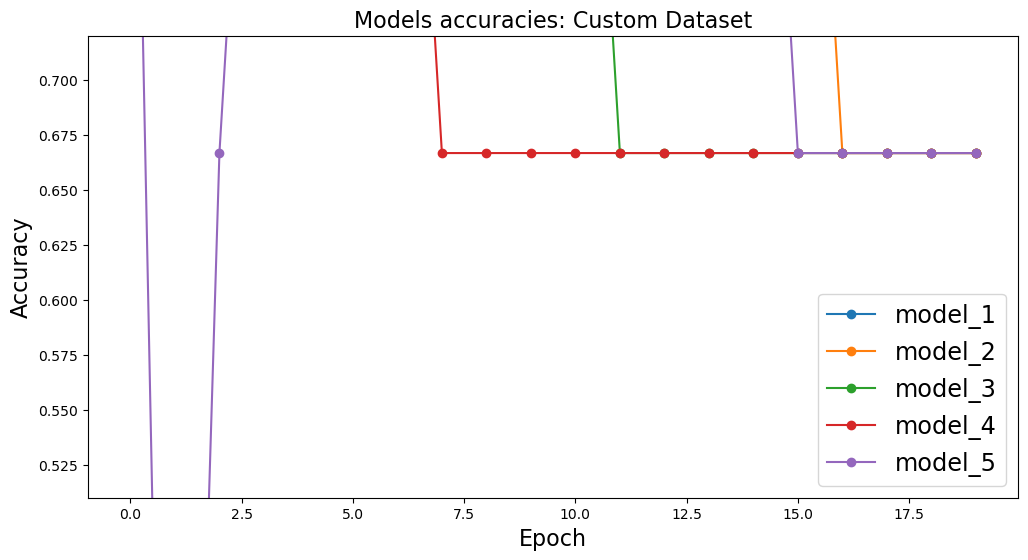

In [12]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies for every model
plt.plot(h[0].history['val_accuracy'], '-o')
plt.plot(h[1].history['val_accuracy'], '-o')
plt.plot(h[2].history['val_accuracy'], '-o')
plt.plot(h[3].history['val_accuracy'], '-o')
plt.plot(h[4].history['val_accuracy'], '-o')


# Setting limit along Y axis
plt.ylim(0.51, 0.72)


# Showing legend
plt.legend(['model_1', 'model_2', 'model_3', 'model_4', 'model_5'],
           loc='lower right',
           fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Giving name to the plot
plt.title('Models accuracies: Custom Dataset', fontsize=16)


# Showing the plot
plt.show()


In [13]:
# Showing list of scheduled learning rate for every epoch
print(h[0].history['lr'])


[0.00035848594, 0.00034056162, 0.00032353355, 0.00030735688, 0.000291989, 0.00027738957, 0.0002635201, 0.00025034408, 0.00023782688, 0.00022593554, 0.00021463877, 0.00020390682, 0.00019371149, 0.0001840259, 0.00017482461, 0.00016608338, 0.00015777921, 0.00014989026, 0.00014239574, 0.00013527596]


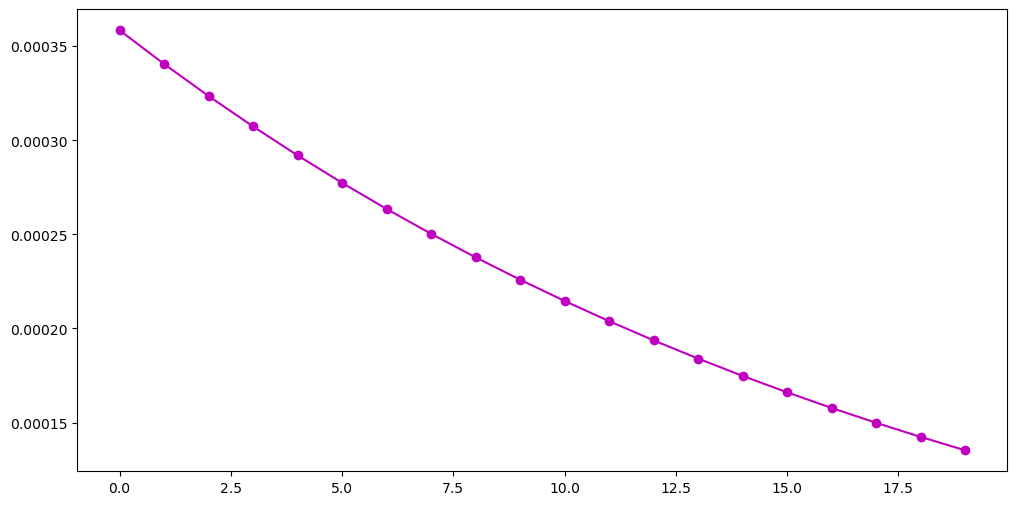

In [14]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h[0].history['lr'], '-mo')


# Showing the plot
plt.show()


### RGB custom dataset (255.0 ==> mean ==> std)

## Step 8: Making a conclusion

In [15]:
# According to validation accuracy, the 2nd, 3rd and 4th models have the highest values

# The choice for custom dataset is 4th model
# RGB input --> {64C5-P2} --> {128C5-P2} --> {256C5-P2} --> {512C5-P2} --> 128 --> 5
# GRAY input --> {64C5-P2} --> {128C5-P2} --> {256C5-P2} --> {512C5-P2} --> 128 --> 5

# RGB input: (64, 64, 3)
# GRAY input: (64, 64, 1)


### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 1: Opening preprocessed dataset

In [16]:
# Opening saved CIFAR-10 dataset from HDF5 binary file
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'cifar10' + '/' +
               'dataset_cifar10_rgb_255_mean_std.hdf5', 'r') as f:
    
    # Showing all keys in the HDF5 binary file
    print(list(f.keys()))
    
    # Extracting saved arrays for training by appropriate keys
    # Saving them into new variables    
    x_train = f['x_train']  # HDF5 dataset
    y_train = f['y_train']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_train = np.array(x_train)  # Numpy arrays
    y_train = np.array(y_train)  # Numpy arrays
    
    
    # Extracting saved arrays for validation by appropriate keys
    # Saving them into new variables 
    x_validation = f['x_validation']  # HDF5 dataset
    y_validation = f['y_validation']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_validation = np.array(x_validation)  # Numpy arrays
    y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Extracting saved arrays for testing by appropriate keys
    # Saving them into new variables 
    x_test = f['x_test']  # HDF5 dataset
    y_test = f['y_test']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_test = np.array(x_test)  # Numpy arrays
    y_test = np.array(y_test)  # Numpy arrays


['x_test', 'x_train', 'x_validation', 'y_test', 'y_train', 'y_validation']


In [17]:
# Showing types of loaded arrays
print(type(x_train))
print(type(y_train))
print(type(x_validation))
print(type(y_validation))
print(type(x_test))
print(type(y_test))
print()


# Showing shapes of loaded arrays
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

(42500, 32, 32, 3)
(42500,)
(7500, 32, 32, 3)
(7500,)
(10000, 32, 32, 3)
(10000,)


### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 2: Converting classes vectors to classes matrices

In [18]:
# Showing class index from the vector
print('Class index from vector:', y_train[1])
print()

# Preparing classes to be passed into the model
# Transforming them from vectors to binary matrices
# It is needed to set relationship between classes to be understood by the algorithm
# Such format is commonly used in training and predicting
y_train = to_categorical(y_train, num_classes = 10)
y_validation = to_categorical(y_validation, num_classes = 10)


# Showing shapes of converted vectors into matrices
print(y_train.shape)
print(y_validation.shape)
print()


# Showing class index from the matrix
print('Class index from matrix:', y_train[1])


Class index from vector: 3

(42500, 10)
(7500, 10)

Class index from matrix: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 3: Choosing number of Feature Maps

### Notation

**C** - convolutional layer  
**P** - pooling  
  
Examples:
* **8C5** - convolutional layer with 8 feature maps and kernels of spatial size 5x5  
* **P2** - pooling operation with 2x2 window and stride 2  
*  **128** - fully connected layer (dense layer) with 128 neurons  
  
Definitions:
* **filters** (also called as kernels or cores) are trainable parameters  
* **weights** are values of filters that network learns during training  
* **strides** are steps by which window of filter size goes through the input  
* **padding** is a 0-valued frame used to process edges of the input  
  
Some keywords values:
* **kernel_size=5** sets the filter size to be 5x5
* **strides=1** is a default value
* **padding='valid'** is a default value, meaning that output will be reduced: kernel_size - 1  
* **padding='same'** means that output will be of the same spatial size as input  
* **activation='relu'** sets ReLU (Rectified Linear Unit) as activation function  
  
Calculations of spatial size for feature maps after convolutional layer:  
* **height_output = 1 + (height_input + 2 * pad - kernel_size) / stride**
* **width_output = 1 + (width_input + 2 * pad - kernel_size) / stride**
  
Example without pad frame:
* **height_output = 1 + (64 + 2 * 0 - 5) / 1 = 60**
* **width_output = 1 + (64 + 2 * 0 - 5) / 1 = 60**
  
Example with pad frame:
* **height_output = 1 + (64 + 2 * 2 - 5) / 1 = 64**
* **width_output = 1 + (64 + 2 * 2 - 5) / 1 = 64**
  

In [19]:
# Building 5 models
# RGB --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> 128 --> 10
# RGB --> {16C5-P2} --> {32C5-P2} --> {64C5-P2} --> 128 --> 10
# RGB --> {32C5-P2} --> {64C5-P2} --> {128C5-P2} --> 128 --> 10
# RGB --> {64C5-P2} --> {128C5-P2} --> {256C5-P2} --> 128 --> 10
# RGB --> {128C5-P2} --> {256C5-P2} --> {512C5-P2} --> 128 --> 10


# Defining list to collect models in
model = []


# Building models in a loop
for i in range(5):
    # Initializing model to be as linear stack of layers
    temp = Sequential()

    # Adding first convolutional-pooling pair
    temp.add(Conv2D(8 * (2 ** i), kernel_size=5, padding='same', activation='relu',
                                                                 input_shape=(32, 32, 3)))
    temp.add(MaxPool2D())

    # Adding second convolutional-pooling pair
    temp.add(Conv2D(16 * (2 ** i), kernel_size=5, padding='same', activation='relu'))
    temp.add(MaxPool2D())

    # Adding third convolutional-pooling pair
    temp.add(Conv2D(32 * (2 ** i), kernel_size=5, padding='same', activation='relu'))
    temp.add(MaxPool2D())

    # Adding fully connected layers
    temp.add(Flatten())
    temp.add(Dense(128, activation='relu'))
    temp.add(Dense(10, activation='softmax'))

    # Compiling created model
    temp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Adding current model in the list
    model.append(temp)


# Check point
print('5 models are compiled successfully')


5 models are compiled successfully


### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 4: Visualizing built CNN models

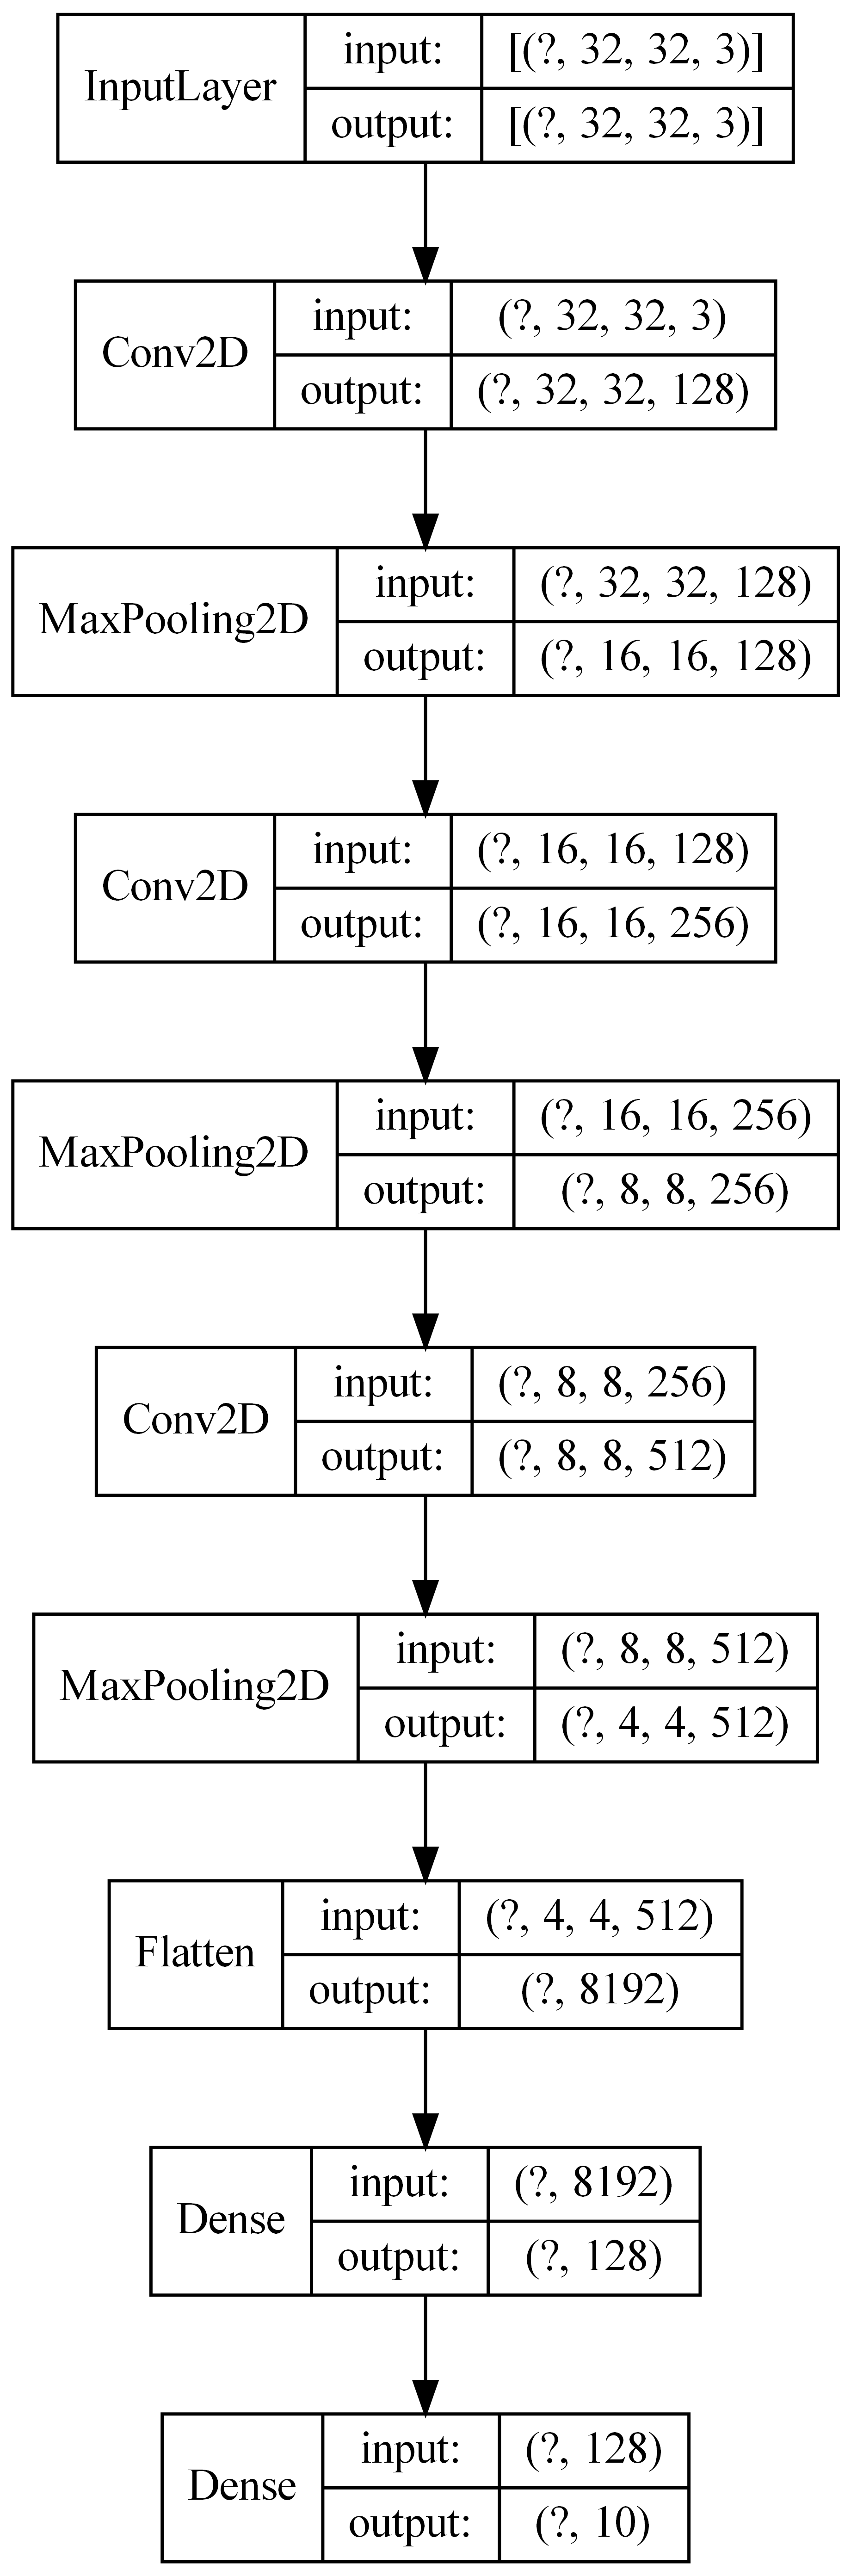

In [20]:
# Plotting model's layers in form of flowchart
plot_model(model[4],
           to_file='model.png',
           show_shapes=True,
           show_layer_names=False,
           rankdir='TB',
           dpi=500)


In [21]:
# Showing model's summary in form of table
model[4].summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 128)       9728      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 256)       819456    
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 8, 8, 512)         3277312   
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 4, 4, 512)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)             

### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 5: Setting up learning rate & epochs

In [22]:
# Defining number of epochs
epochs = 20

# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs), verbose=1)

# Check point
print('Number of epochs and schedule for learning rate are set successfully')


Number of epochs and schedule for learning rate are set successfully


### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 6: Training built CNN models

In [23]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Defining list to collect results in
h = []


# Training models in a loop
for i in range(5):
    # Сurrent model
    temp = model[i].fit(x_train, y_train,
                        batch_size=50,
                        epochs=epochs,
                        validation_data=(x_validation, y_validation),
                        callbacks=[learning_rate],
                        verbose=1)
    
    # Adding results of current model in the list
    h.append(temp)



Epoch 00001: LearningRateScheduler reducing learning rate to 0.0003584859224085419.
Epoch 1/20
850/850 [==============================] - 19s 23ms/step - loss: 1.6229 - accuracy: 0.4156 - val_loss: 1.3780 - val_accuracy: 0.5081

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0003405616262881148.
Epoch 2/20
850/850 [==============================] - 21s 24ms/step - loss: 1.3159 - accuracy: 0.5320 - val_loss: 1.2739 - val_accuracy: 0.5477

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000323533544973709.
Epoch 3/20
850/850 [==============================] - 23s 27ms/step - loss: 1.1849 - accuracy: 0.5824 - val_loss: 1.1657 - val_accuracy: 0.5875

Epoch 00004: LearningRateScheduler reducing learning rate to 0.00030735686772502356.
Epoch 4/20
850/850 [==============================] - 20s 24ms/step - loss: 1.0915 - accuracy: 0.6198 - val_loss: 1.1006 - val_accuracy: 0.6099

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0002919890243387724.

KeyboardInterrupt: 

### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 7: Showing and plotting accuracies

In [ ]:
# Accuracies of the models
for i in range(5):
    print('Model {0}: Training accuracy={1:.5f}, Validation accuracy={2:.5f}'.
                                                         format(i + 1,
                                                                max(h[i].history['accuracy']),
                                                                max(h[i].history['val_accuracy'])))


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies for every model
plt.plot(h[0].history['val_accuracy'], '-o')
plt.plot(h[1].history['val_accuracy'], '-o')
plt.plot(h[2].history['val_accuracy'], '-o')
plt.plot(h[3].history['val_accuracy'], '-o')
plt.plot(h[4].history['val_accuracy'], '-o')


# Setting limit along Y axis
plt.ylim(0.50, 0.80)


# Showing legend
plt.legend(['model_1', 'model_2', 'model_3', 'model_4', 'model_5'], loc='lower right',
                                                                    fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Giving name to the plot
plt.title('Models accuracies: CIFAR-10 dataset', fontsize=16)


# Showing the plot
plt.show()


In [ ]:
# Showing list of scheduled learning rate for every epoch
print(h[0].history['lr'])


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h[0].history['lr'], '-mo')


# Showing the plot
plt.show()


### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 8: Making a conclusion

In [ ]:
# According to validation accuracy, the 4th and 5th models have the highest values

# The choice for CIFAR-10 dataset is 5th model
# RGB input --> {128C5-P2} --> {256C5-P2} --> {512C5-P2} --> 128 --> 10
# GRAY input --> {128C5-P2} --> {256C5-P2} --> {512C5-P2} --> 128 --> 10

# RGB input: (32, 32, 3)
# GRAY input: (32, 32, 1)


### GRAY MNIST dataset (255.0 ==> mean ==> std)

## Step 1: Opening preprocessed dataset

In [ ]:
# Opening saved MNIST dataset from HDF5 binary file
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'mnist' + '/' +
               'dataset_mnist_gray_255_mean_std.hdf5', 'r') as f:
    
    # Showing all keys in the HDF5 binary file
    print(list(f.keys()))
    
    # Extracting saved arrays for training by appropriate keys
    # Saving them into new variables    
    x_train = f['x_train']  # HDF5 dataset
    y_train = f['y_train']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_train = np.array(x_train)  # Numpy arrays
    y_train = np.array(y_train)  # Numpy arrays
    
    
    # Extracting saved arrays for validation by appropriate keys
    # Saving them into new variables 
    x_validation = f['x_validation']  # HDF5 dataset
    y_validation = f['y_validation']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_validation = np.array(x_validation)  # Numpy arrays
    y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Extracting saved arrays for testing by appropriate keys
    # Saving them into new variables 
    x_test = f['x_test']  # HDF5 dataset
    y_test = f['y_test']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_test = np.array(x_test)  # Numpy arrays
    y_test = np.array(y_test)  # Numpy arrays


In [ ]:
# Showing types of loaded arrays
print(type(x_train))
print(type(y_train))
print(type(x_validation))
print(type(y_validation))
print(type(x_test))
print(type(y_test))
print()


# Showing shapes of loaded arrays
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)


### GRAY MNIST dataset (255.0 ==> mean ==> std)

## Step 2: Converting classes vectors to classes matrices

In [ ]:
# Showing class index from the vector
print('Class index from vector:', y_train[1])
print()

# Preparing classes to be passed into the model
# Transforming them from vectors to binary matrices
# It is needed to set relationship between classes to be understood by the algorithm
# Such format is commonly used in training and predicting
y_train = to_categorical(y_train, num_classes = 10)
y_validation = to_categorical(y_validation, num_classes = 10)


# Showing shapes of converted vectors into matrices
print(y_train.shape)
print(y_validation.shape)
print()


# Showing class index from the matrix
print('Class index from matrix:', y_train[1])


### GRAY MNIST dataset (255.0 ==> mean ==> std)

## Step 3: Choosing number of Feature Maps

### Notation

**C** - convolutional layer  
**P** - pooling  
  
Examples:
* **8C5** - convolutional layer with 8 feature maps and kernels of spatial size 5x5  
* **P2** - pooling operation with 2x2 window and stride 2  
*  **128** - fully connected layer (dense layer) with 128 neurons  
  
Definitions:
* **filters** (also called as kernels or cores) are trainable parameters  
* **weights** are values of filters that network learns during training  
* **strides** are steps by which window of filter size goes through the input  
* **padding** is a 0-valued frame used to process edges of the input  
  
Some keywords values:
* **kernel_size=5** sets the filter size to be 5x5
* **strides=1** is a default value
* **padding='valid'** is a default value, meaning that output will be reduced: kernel_size - 1  
* **padding='same'** means that output will be of the same spatial size as input  
* **activation='relu'** sets ReLU (Rectified Linear Unit) as activation function  
  
Calculations of spatial size for feature maps after convolutional layer:  
* **height_output = 1 + (height_input + 2 * pad - kernel_size) / stride**
* **width_output = 1 + (width_input + 2 * pad - kernel_size) / stride**
  
Example without pad frame:
* **height_output = 1 + (64 + 2 * 0 - 5) / 1 = 60**
* **width_output = 1 + (64 + 2 * 0 - 5) / 1 = 60**
  
Example with pad frame:
* **height_output = 1 + (64 + 2 * 2 - 5) / 1 = 64**
* **width_output = 1 + (64 + 2 * 2 - 5) / 1 = 64**
  

In [ ]:
# Building 5 models
# GRAY --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> 128 --> 10
# GRAY --> {16C5-P2} --> {32C5-P2} --> {64C5-P2} --> 128 --> 10
# GRAY --> {32C5-P2} --> {64C5-P2} --> {128C5-P2} --> 128 --> 10
# GRAY --> {64C5-P2} --> {128C5-P2} --> {256C5-P2} --> 128 --> 10
# GRAY --> {128C5-P2} --> {256C5-P2} --> {512C5-P2} --> 128 --> 10


# Defining list to collect models in
model = []


# Building models in a loop
for i in range(5):
    # Initializing model to be as linear stack of layers
    temp = Sequential()

    # Adding first convolutional-pooling pair
    temp.add(Conv2D(8 * (2 ** i), kernel_size=5, padding='same', activation='relu',
                                                                 input_shape=(28, 28, 1)))
    temp.add(MaxPool2D())

    # Adding second convolutional-pooling pair
    temp.add(Conv2D(16 * (2 ** i), kernel_size=5, padding='same', activation='relu'))
    temp.add(MaxPool2D())
    
    # Adding third convolutional-pooling pair
    temp.add(Conv2D(32 * (2 ** i), kernel_size=5, padding='same', activation='relu'))
    temp.add(MaxPool2D())

    # Adding fully connected layers
    temp.add(Flatten())
    temp.add(Dense(128, activation='relu'))
    temp.add(Dense(10, activation='softmax'))

    # Compiling created model
    temp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Adding current model in the list
    model.append(temp)


# Check point
print('5 models are compiled successfully')


### GRAY MNIST dataset (255.0 ==> mean ==> std)

## Step 4: Visualizing built CNN models

In [ ]:
# Plotting model's layers in form of flowchart
plot_model(model[4],
           to_file='model.png',
           show_shapes=True,
           show_layer_names=False,
           rankdir='TB',
           dpi=500)


In [ ]:
# Showing model's summary in form of table
model[4].summary()


### GRAY MNIST dataset (255.0 ==> mean ==> std)

## Step 5: Setting up learning rate & epochs

In [ ]:
# Defining number of epochs
epochs = 20

# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs), verbose=1)

# Check point
print('Number of epochs and schedule for learning rate are set successfully')


### GRAY MNIST dataset (255.0 ==> mean ==> std)

## Step 6: Training built CNN models

In [ ]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Defining list to collect results in
h = []


# Training models in a loop
for i in range(5):
    # Сurrent model
    temp = model[i].fit(x_train, y_train,
                        batch_size=50,
                        epochs=epochs,
                        validation_data=(x_validation, y_validation),
                        callbacks=[learning_rate],
                        verbose=1)
    
    # Adding results of current model in the list
    h.append(temp)


### GRAY MNIST dataset (255.0 ==> mean ==> std)

## Step 7: Showing and plotting accuracies

In [ ]:
# Accuracies of the models
for i in range(5):
    print('Model {0}: Training accuracy={1:.5f}, Validation accuracy={2:.5f}'.
                                                         format(i + 1,
                                                                max(h[i].history['accuracy']),
                                                                max(h[i].history['val_accuracy'])))


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies for every model
plt.plot(h[0].history['val_accuracy'], '-o')
plt.plot(h[1].history['val_accuracy'], '-o')
plt.plot(h[2].history['val_accuracy'], '-o')
plt.plot(h[3].history['val_accuracy'], '-o')
plt.plot(h[4].history['val_accuracy'], '-o')


# Setting limit along Y axis
plt.ylim(0.975, 0.9946)


# Showing legend
plt.legend(['model_1', 'model_2', 'model_3', 'model_4', 'model_5'],
           loc='lower right',
           fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Giving name to the plot
plt.title('Models accuracies: MNIST dataset', fontsize=16)


# Showing the plot
plt.show()


In [ ]:
# Showing list of scheduled learning rate for every epoch
print(h[0].history['lr'])


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h[0].history['lr'], '-mo')


# Showing the plot
plt.show()


### MNIST dataset (255.0 ==> mean ==> std)

## Step 8: Making a conclusion

In [ ]:
# According to validation accuracy, the 3rd, 4th and 5th models have the highest values

# The choice for MNIST dataset is 5th model
# GRAY input --> {128C5-P2} --> {256C5-P2} --> {512C5-P2} --> 128 --> 10

# GRAY input: (28, 28, 1)


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 1: Opening preprocessed dataset

In [ ]:
# Opening saved Traffic Signs dataset from HDF5 binary file
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'ts' + '/' +
               'dataset_ts_rgb_255_mean_std.hdf5', 'r') as f:
    
    # Showing all keys in the HDF5 binary file
    print(list(f.keys()))
    
    # Extracting saved arrays for training by appropriate keys
    # Saving them into new variables    
    x_train = f['x_train']  # HDF5 dataset
    y_train = f['y_train']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_train = np.array(x_train)  # Numpy arrays
    y_train = np.array(y_train)  # Numpy arrays
    
    
    # Extracting saved arrays for validation by appropriate keys
    # Saving them into new variables 
    x_validation = f['x_validation']  # HDF5 dataset
    y_validation = f['y_validation']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_validation = np.array(x_validation)  # Numpy arrays
    y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Extracting saved arrays for testing by appropriate keys
    # Saving them into new variables 
    x_test = f['x_test']  # HDF5 dataset
    y_test = f['y_test']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_test = np.array(x_test)  # Numpy arrays
    y_test = np.array(y_test)  # Numpy arrays


In [ ]:
# Showing types of loaded arrays
print(type(x_train))
print(type(y_train))
print(type(x_validation))
print(type(y_validation))
print(type(x_test))
print(type(y_test))
print()


# Showing shapes of loaded arrays
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 2: Converting classes vectors to classes matrices

In [ ]:
# Showing class index from the vector
print('Class index from vector:', y_train[1])
print()

# Preparing classes to be passed into the model
# Transforming them from vectors to binary matrices
# It is needed to set relationship between classes to be understood by the algorithm
# Such format is commonly used in training and predicting
y_train = to_categorical(y_train, num_classes = 43)
y_validation = to_categorical(y_validation, num_classes = 43)


# Showing shapes of converted vectors into matrices
print(y_train.shape)
print(y_validation.shape)
print()


# Showing class index from the matrix
print('Class index from matrix:', y_train[1])


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 3: Choosing number of Feature Maps

### Notation

**C** - convolutional layer  
**P** - pooling  
  
Examples:
* **8C5** - convolutional layer with 8 feature maps and kernels of spatial size 5x5  
* **P2** - pooling operation with 2x2 window and stride 2  
*  **128** - fully connected layer (dense layer) with 128 neurons  
  
Definitions:
* **filters** (also called as kernels or cores) are trainable parameters  
* **weights** are values of filters that network learns during training  
* **strides** are steps by which window of filter size goes through the input  
* **padding** is a 0-valued frame used to process edges of the input  
  
Some keywords values:
* **kernel_size=5** sets the filter size to be 5x5
* **strides=1** is a default value
* **padding='valid'** is a default value, meaning that output will be reduced: kernel_size - 1  
* **padding='same'** means that output will be of the same spatial size as input  
* **activation='relu'** sets ReLU (Rectified Linear Unit) as activation function  
  
Calculations of spatial size for feature maps after convolutional layer:  
* **height_output = 1 + (height_input + 2 * pad - kernel_size) / stride**
* **width_output = 1 + (width_input + 2 * pad - kernel_size) / stride**
  
Example without pad frame:
* **height_output = 1 + (64 + 2 * 0 - 5) / 1 = 60**
* **width_output = 1 + (64 + 2 * 0 - 5) / 1 = 60**
  
Example with pad frame:
* **height_output = 1 + (64 + 2 * 2 - 5) / 1 = 64**
* **width_output = 1 + (64 + 2 * 2 - 5) / 1 = 64**
  

In [ ]:
# Building 5 models
# RGB --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> {64C3-P2} --> 128 --> 43
# RGB --> {16C5-P2} --> {32C5-P2} --> {64C5-P2} --> {128C3-P2} --> 128 --> 43
# RGB --> {32C5-P2} --> {64C5-P2} --> {128C5-P2} --> {256C3-P2} --> 128 --> 43
# RGB --> {64C5-P2} --> {128C5-P2} --> {256C5-P2} --> {512C3-P2} --> 128 --> 43
# RGB --> {128C5-P2} --> {256C5-P2} --> {512C5-P2} --> {1024C3-P2} --> 128 --> 43


# Defining list to collect models in
model = []


# Building models in a loop
for i in range(5):
    # Initializing model to be as linear stack of layers
    temp = Sequential()

    # Adding first convolutional-pooling pair
    temp.add(Conv2D(8 * (2 ** i), kernel_size=5, padding='same', activation='relu',
                                                                 input_shape=(48, 48, 3)))
    temp.add(MaxPool2D())

    # Adding second convolutional-pooling pair
    temp.add(Conv2D(16 * (2 ** i), kernel_size=5, padding='same', activation='relu'))
    temp.add(MaxPool2D())

    # Adding third convolutional-pooling pair
    temp.add(Conv2D(32 * (2 ** i), kernel_size=5, padding='same', activation='relu'))
    temp.add(MaxPool2D())

    # Adding fourth convolutional-pooling pair
    temp.add(Conv2D(64 * (2 ** i), kernel_size=3, padding='same', activation='relu'))
    temp.add(MaxPool2D())

    # Adding fully connected layers
    temp.add(Flatten())
    temp.add(Dense(128, activation='relu'))
    temp.add(Dense(43, activation='softmax'))

    # Compiling created model
    temp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Adding current model in the list
    model.append(temp)
    

# Check point
print('5 models are compiled successfully')


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 4: Visualizing built CNN models

In [ ]:
# Plotting model's layers in form of flowchart
plot_model(model[4],
           to_file='model.png',
           show_shapes=True,
           show_layer_names=False,
           rankdir='TB',
           dpi=500)


In [ ]:
# Showing model's summary in form of table
model[4].summary()


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 5: Setting up learning rate & epochs

In [ ]:
# Defining number of epochs
epochs = 20

# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs), verbose=1)

# Check point
print('Number of epochs and schedule for learning rate are set successfully')


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 6: Training built CNN models

In [ ]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Defining list to collect results in
h = []


# Training models in a loop
for i in range(5):
    # Сurrent model
    temp = model[i].fit(x_train, y_train,
                        batch_size=50,
                        epochs=epochs,
                        validation_data=(x_validation, y_validation),
                        callbacks=[learning_rate],
                        verbose=1)
    
    # Adding results of current model in the list
    h.append(temp)


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 7: Showing and plotting accuracies

In [ ]:
# Accuracies of the models
for i in range(5):
    print('Model {0}: Training accuracy={1:.5f}, Validation accuracy={2:.5f}'.
                                                         format(i + 1,
                                                                max(h[i].history['accuracy']),
                                                                max(h[i].history['val_accuracy'])))


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies for every model
plt.plot(h[0].history['val_accuracy'], '-o')
plt.plot(h[1].history['val_accuracy'], '-o')
plt.plot(h[2].history['val_accuracy'], '-o')
plt.plot(h[3].history['val_accuracy'], '-o')
plt.plot(h[4].history['val_accuracy'], '-o')


# Setting limit along Y axis
plt.ylim(0.97, 0.999)


# Showing legend
plt.legend(['model_1', 'model_2', 'model_3', 'model_4', 'model_5'], loc='lower right',
                                                                    fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Giving name to the plot
plt.title('Models accuracies: Traffic Signs dataset', fontsize=16)


# Showing the plot
plt.show()


In [ ]:
# Showing list of scheduled learning rate for every epoch
print(h[0].history['lr'])


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h[0].history['lr'], '-mo')


# Showing the plot
plt.show()


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 8: Making a conclusion

In [ ]:
# According to validation accuracy, the 3rd, 4th and 5th models have the highest values

# The choice for Traffic Signs dataset is 4th model
# RGB input --> {128C5-P2} --> {256C5-P2} --> {512C5-P2} --> {1024C3-P2} --> 128 --> 43
# GRAY input --> {128C5-P2} --> {256C5-P2} --> {512C5-P2} --> {1024C3-P2} --> 128 --> 43

# RGB input: (48, 48, 3)
# GRAY input: (48, 48, 1)


### Some comments

To get more details for usage of 'Sequential' class:  
**print(help(Sequential))**  
  
More details and examples are here:  
https://keras.io/api/models/sequential/


To get more details for usage of function 'to_categorical':  
**print(help(to_categorical))**  

More details and examples are here:  
https://keras.io/api/utils/python_utils/#to_categorical-function 


To get more details for usage of function 'plot_model':  
**print(help(plot_model))**  

More details and examples are here:  
https://keras.io/api/utils/model_plotting_utils/#plot_model-function  


To get more details for usage of function 'plt.plot':  
**print(help(plt.plot))**  

More details and examples are here:  
https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.plot.html


In [ ]:
print(help(Sequential))

In [ ]:
print(help(to_categorical))

In [ ]:
print(help(plot_model))

In [ ]:
print(help(plt.plot))